In [2]:
# import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to calculate safety stock
def calculate_safety_stock(demand_mean, demand_std, lead_time, service_level):
    z_scores = {90: 1.28, 95: 1.65, 99: 2.33}
    z = z_scores.get(service_level, 1.65)  # Default to 95%
    safety_stock = z * demand_std * np.sqrt(lead_time)
    return safety_stock

# Function to calculate reorder point
def calculate_reorder_point(demand_mean, lead_time, safety_stock):
    return (demand_mean * lead_time) + safety_stock

# Function to calculate inventory cost
def calculate_inventory_cost(safety_stock, holding_cost_per_unit, order_cost, demand_mean, order_quantity):
    holding_cost = safety_stock * holding_cost_per_unit
    ordering_cost = (demand_mean / order_quantity) * order_cost
    return holding_cost + ordering_cost

In [4]:
# Streamlit UI Setup
# st.title("Inventory Optimization Tool")
# st.sidebar.header("Input Parameters")

# User Inputs
# demand_mean = st.sidebar.number_input("Average Demand per Period", min_value=1, value=100)
# demand_std = st.sidebar.number_input("Demand Standard Deviation", min_value=0, value=20)
# lead_time = st.sidebar.number_input("Lead Time (days)", min_value=1, value=5)
# service_level = st.sidebar.selectbox("Service Level (%)", [90, 95, 99], index=1)
# holding_cost_per_unit = st.sidebar.number_input("Holding Cost per Unit ($)", min_value=0.01, value=1.0)
# order_cost = st.sidebar.number_input("Ordering Cost ($)", min_value=1.0, value=50.0)
# order_quantity = st.sidebar.number_input("Order Quantity", min_value=1, value=500)

demand_mean = 50
demand_std = 10
lead_time = 4
service_level = 95
holding_cost_per_unit = 0.85
order_cost = 30
order_quantity = 30

In [5]:
# Compute Safety Stock and Reorder Point
safety_stock = calculate_safety_stock(demand_mean, demand_std, lead_time, service_level)
reorder_point = calculate_reorder_point(demand_mean, lead_time, safety_stock)
inventory_cost = calculate_inventory_cost(safety_stock, holding_cost_per_unit, order_cost, demand_mean, order_quantity)

# st.write(f"### Recommended Safety Stock: {round(safety_stock)} units")
# st.write(f"### Reorder Point: {round(reorder_point)} units")
# st.write(f"### Estimated Annual Inventory Cost: ${round(inventory_cost, 2)}")

/var/folders/13/tb353hv16bg0qsrdngc6r2v40000gn/T/ipykernel_98688/177136528.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


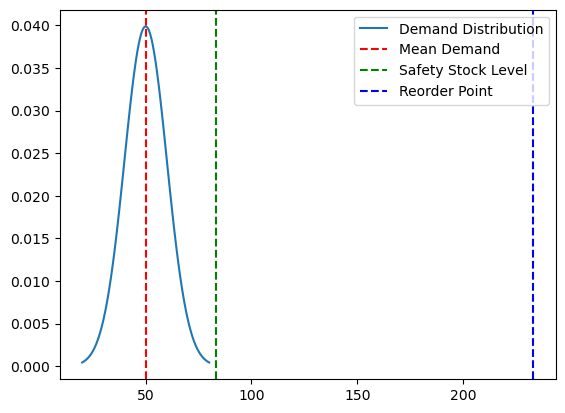

In [8]:
# Visualization
# fig, ax = plt.subplots()
# x = np.linspace(demand_mean - 3*demand_std, demand_mean + 3*demand_std, 100)
# y = (1 / (demand_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - demand_mean) / demand_std) ** 2)
# ax.plot(x, y, label="Demand Distribution")
# ax.axvline(demand_mean, color='r', linestyle='--', label="Mean Demand")
# ax.axvline(demand_mean + safety_stock, color='g', linestyle='--', label="Safety Stock Level")
# ax.axvline(reorder_point, color='b', linestyle='--', label="Reorder Point")
# ax.legend()
# st.pyplot(fig)

fig = plt.figure()
x = np.linspace(demand_mean - 3*demand_std, demand_mean + 3*demand_std, 100)
y = (1 / (demand_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - demand_mean) / demand_std) ** 2)
plt.plot(x, y, label="Demand Distribution")
plt.axvline(demand_mean, color='r', linestyle='--', label="Mean Demand")
plt.axvline(demand_mean + safety_stock, color='g', linestyle='--', label="Safety Stock Level")
plt.axvline(reorder_point, color='b', linestyle='--', label="Reorder Point")
plt.legend()
fig.show()

In [ ]:
# st.write("Use the sidebar to adjust parameters and see the impact on safety stock, reorder point, and cost calculations.")

NameError: name 'st' is not defined